# 1. Install Dependencies and Setup

In [60]:
import tensorflow as tf
import os
from sklearn import metrics
import random as python_random
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow import keras
import math

find . -name "*.DS_Store" -type f -delete # use in terminal if data doesn't load first time (mac issue)

# 2. Remove dodgy images

In [62]:
import cv2
import imghdr

In [63]:
# data_dir = 'data' 

train_dir = './augmentedData/Train/'
test_dir = './augmentedData/Test/'
batch_dir = './batchdata/Train/'


In [64]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [65]:
for image_class in os.listdir(train_dir): 
    for image in os.listdir(os.path.join(train_dir, image_class)):
        image_path = os.path.join(train_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            # tip = imghdr.what(image_path)
            # if tip not in image_exts: 
            #     print('Image not in ext list {}'.format(image_path))
            #     os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known inc

In [66]:
for image_class in os.listdir(test_dir): 
    for image in os.listdir(os.path.join(test_dir, image_class)):
        image_path = os.path.join(test_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            # tip = imghdr.what(image_path)
            # if tip not in image_exts: 
            #     print('Image not in ext list {}'.format(image_path))
            #     os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

Total_train_data aangemaakt om balans tussen klassen in de set weer te geven

In [67]:
# data = tf.keras.utils.image_dataset_from_directory('data') changed from relative path to variable
total_train_data = tf.keras.utils.image_dataset_from_directory(train_dir, batch_size=4000)
train_data = tf.keras.utils.image_dataset_from_directory(train_dir, image_size=(100, 100),)

Found 4000 files belonging to 4 classes.
Found 4000 files belonging to 4 classes.


In [68]:
for sample in train_data:
    print (sample[0].shape)

(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)


2022-11-17 12:12:58.387783: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:12:58.392126: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:12:58.394446: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:12:58.408021: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:12:58.412259: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:12:58.431449: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:12:58.433578: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:12:58.443532: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:12:58.443557: W tensorflow/core/lib/png/png_io.cc:88] PNG 

(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 

2022-11-17 12:12:58.591393: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:12:58.592997: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:12:58.607720: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:12:58.614374: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:12:58.624768: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:12:58.630808: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:12:58.649910: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:12:58.649952: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:12:58.666271: W tensorflow/core/lib/png/png_io.cc:88] PNG 

testData = tf.keras.preprocessing.image_dataset_from_directory(
    dataDirectory,
    labels='inferred',
    label_mode='categorical',
    seed=324893,
    image_size=(height,width),
    batch_size=32)


predictions = np.array([])
labels =  np.array([])
for x, y in testData:
  predictions = np.concatenate([predictions, model.predict_classes(x)])
  labels = np.concatenate([labels, np.argmax(y.numpy())])

In [69]:
print (image_path)

augmentedData/Test/Rot_Apple/Rot_Apple11.jpg


In [70]:
    for element in total_train_data.as_numpy_iterator(): 
        X, y = element
    # print (y)  

unique2, counts2 = np.unique(y, return_counts=True)
dict(zip(unique2, counts2))

2022-11-17 12:12:58.887904: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:12:58.914700: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:12:58.952759: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:12:58.974206: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:12:58.993574: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:12:59.061036: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:12:59.114902: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:12:59.115597: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:12:59.156043: W tensorflow/core/lib/png/png_io.cc:88] PNG 

{0: 1000, 1: 1000, 2: 1000, 3: 1000}

blotch 32%, normal 18%, rot 27%, scab 23% 

In [71]:
print (train_data.class_names)

['Blotch_Apple', 'Normal_Apple', 'Rot_Apple', 'Scab_Apple']


In [72]:
test_data = tf.keras.utils.image_dataset_from_directory(test_dir, image_size=(100, 100), shuffle=True, batch_size=120)

Found 120 files belonging to 4 classes.


In [73]:
    for element in test_data.as_numpy_iterator(): 
        X, y = element
    # print (y)  

unique2, counts2 = np.unique(y, return_counts=True)
dict(zip(unique2, counts2))

{0: 30, 1: 24, 2: 38, 3: 28}

In [74]:
# data_iterator = data.as_numpy_iterator()
train_iterator = train_data.as_numpy_iterator()

In [75]:
test_iterator = test_data.as_numpy_iterator()

In [76]:
# batch = data_iterator.next()
train_batch = train_iterator.next()

2022-11-17 12:13:06.990421: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:06.995668: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:06.998169: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


In [77]:
test_batch = test_iterator.next()

VISUALISE TRAIN AND TEST DATA

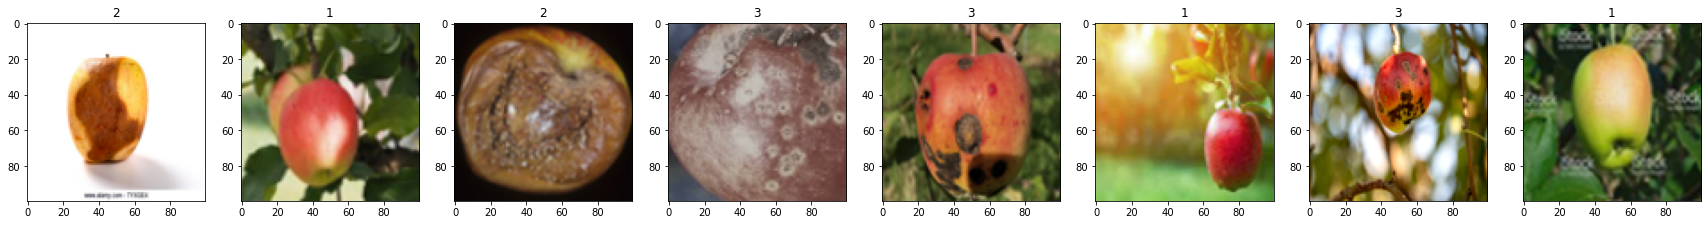

In [78]:
fig, ax = plt.subplots(ncols=8, figsize=(30,30))
for idx, img in enumerate(train_batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(train_batch[1][idx])

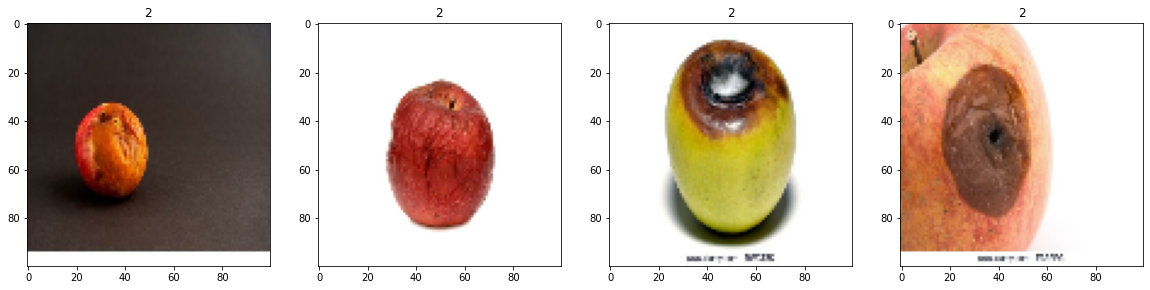

In [79]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(test_batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(test_batch[1][idx])

# 4. Scale Data

In [80]:
train_data = train_data.map(lambda x,y: (x/255, y))

In [81]:
test_data = test_data.map(lambda x,y: (x/255, y))

In [82]:
train_data.as_numpy_iterator().next()

2022-11-17 12:13:09.039429: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:09.044734: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:09.046833: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


(array([[[[0.9411765 , 0.9411765 , 0.9411765 ],
          [0.9445098 , 0.9445098 , 0.9445098 ],
          [0.93039215, 0.93039215, 0.91862744],
          ...,
          [0.37941176, 0.25588235, 0.21078432],
          [0.36352947, 0.2505881 , 0.2113724 ],
          [0.35686275, 0.27058825, 0.23137255]],
 
         [[0.9345098 , 0.9345098 , 0.9311765 ],
          [0.95484316, 0.95484316, 0.94867647],
          [0.8837255 , 0.8762255 , 0.8602941 ],
          ...,
          [0.38107845, 0.2617157 , 0.21245098],
          [0.35519633, 0.23742169, 0.19203931],
          [0.3201961 , 0.22058824, 0.17803922]],
 
         [[0.93921566, 0.93921566, 0.93235296],
          [0.952549  , 0.952549  , 0.94735295],
          [0.8254902 , 0.8144608 , 0.79632354],
          ...,
          [0.41666666, 0.30465686, 0.2502451 ],
          [0.3687259 , 0.24877484, 0.20186307],
          [0.3137255 , 0.20294118, 0.15686275]],
 
         ...,
 
         [[0.7911765 , 0.79509807, 0.79509807],
          [0.78034

In [83]:
test_data.as_numpy_iterator().next()

(array([[[[0.9254902 , 0.9372549 , 0.9647059 ],
          [0.93643135, 0.943549  , 0.972549  ],
          [0.94509804, 0.9490196 , 0.96862745],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[0.92878234, 0.94054705, 0.967998  ],
          [0.93643135, 0.9446333 , 0.9703804 ],
          [0.94599015, 0.9499117 , 0.96951956],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[0.92941177, 0.9411765 , 0.96862745],
          [0.93798035, 0.94664705, 0.9662549 ],
          [0.9463725 , 0.9502941 , 0.9699019 ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[0.996353  , 0.996353  , 0.996353  ],
          [0.99525

# 5. Split Data

In [84]:
imageCountTrain = len(train_data)
print (imageCountTrain)
imageCountTest = len(test_data)
print (imageCountTest)

125
1


In [85]:
train_size = int(len(train_data)*.8)
val_size = int(len(train_data)*.2)
test_size = int(len(test_data))

In [86]:
print (train_size)

100


train_size

In [87]:
val_size

25

In [88]:
test_size

1

In [89]:
train = train_data.take(train_size)
val = train_data.skip(train_size).take(val_size)
test = test_data.take(test_size)

# 6. Build Deep Learning Model

In [90]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 100, 100, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [91]:
# Define a simple sequential model
num_classes = 4
# lossFunction = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# gdAlgorithm = keras.optimizers.Adam(learning_rate=0.001)
# nrOfEpochs = 5
img_height = 100
img_width = 100
image_size=(img_height, img_width)
batch_size = 128

opt = tf.keras.optimizers.Adam(learning_rate=0.001)


def create_model():
  model = tf.keras.Sequential([
    keras.layers.Conv2D(32, 3,input_shape=(img_height, img_width, 3), activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense ((num_classes),activation='softmax')
  ])

  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

  return model

# Create a basic model instance
model = create_model()

# Display the model's architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 10, 10, 32)      

# 7. Train

In [92]:
logdir='logs'

In [93]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [94]:
# tf.random.set_seed(221)
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10


2022-11-17 12:13:10.414906: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:10.422153: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:10.425065: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:10.466601: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:10.501451: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:10.586065: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:10.590437: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  5/100 [>.............................] - ETA: 10s - loss: 1.3705 - sparse_categorical_accuracy: 0.2688

2022-11-17 12:13:10.983597: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:10.984980: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:11.087559: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 16/100 [===>..........................] - ETA: 9s - loss: 1.2932 - sparse_categorical_accuracy: 0.3711

2022-11-17 12:13:12.218633: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:12.349591: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 18/100 [====>.........................] - ETA: 9s - loss: 1.2748 - sparse_categorical_accuracy: 0.3872

2022-11-17 12:13:12.476055: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 32/100 [========>.....................] - ETA: 7s - loss: 1.1897 - sparse_categorical_accuracy: 0.4531

2022-11-17 12:13:13.764826: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:13.955506: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 36/100 [=========>....................] - ETA: 6s - loss: 1.1696 - sparse_categorical_accuracy: 0.4705

2022-11-17 12:13:14.149249: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 39/100 [==========>...................] - ETA: 6s - loss: 1.1655 - sparse_categorical_accuracy: 0.4768

2022-11-17 12:13:14.435559: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 42/100 [===========>..................] - ETA: 6s - loss: 1.1494 - sparse_categorical_accuracy: 0.4881

2022-11-17 12:13:14.718112: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:14.814005: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 45/100 [============>.................] - ETA: 5s - loss: 1.1328 - sparse_categorical_accuracy: 0.5007

2022-11-17 12:13:15.014765: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 53/100 [==============>...............] - ETA: 4s - loss: 1.1087 - sparse_categorical_accuracy: 0.5171

2022-11-17 12:13:15.786764: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:15.973311: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 59/100 [================>.............] - ETA: 4s - loss: 1.0782 - sparse_categorical_accuracy: 0.5355

2022-11-17 12:13:16.367315: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:16.368055: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:16.555392: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:16.556851: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 66/100 [==================>...........] - ETA: 3s - loss: 1.0620 - sparse_categorical_accuracy: 0.5488

2022-11-17 12:13:17.018757: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:17.217386: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 72/100 [====================>.........] - ETA: 2s - loss: 1.0509 - sparse_categorical_accuracy: 0.5573

2022-11-17 12:13:17.603854: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 74/100 [=====================>........] - ETA: 2s - loss: 1.0488 - sparse_categorical_accuracy: 0.5600

2022-11-17 12:13:17.887181: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 83/100 [=======================>......] - ETA: 1s - loss: 1.0285 - sparse_categorical_accuracy: 0.5670

2022-11-17 12:13:18.741419: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:18.741556: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 88/100 [=========================>....] - ETA: 1s - loss: 1.0178 - sparse_categorical_accuracy: 0.5721

2022-11-17 12:13:19.204274: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/100 [==============================] - ETA: 0s - loss: 0.9898 - sparse_categorical_accuracy: 0.5869

2022-11-17 12:13:20.796862: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:20.801487: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:20.803506: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:20.820330: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:20.827556: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:20.861262: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:20.864533: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:20.883565: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:20.883818: W tensorflow/core/lib/png/png_io.cc:88] PNG 

100/100 [==============================] - 12s 113ms/step - loss: 0.9898 - sparse_categorical_accuracy: 0.5869 - val_loss: 0.7024 - val_sparse_categorical_accuracy: 0.7325
Epoch 2/10
  1/100 [..............................] - ETA: 16s - loss: 0.5675 - sparse_categorical_accuracy: 0.7188

2022-11-17 12:13:21.912512: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:21.918409: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:21.920860: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:21.935358: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:21.939682: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  3/100 [..............................] - ETA: 11s - loss: 0.6210 - sparse_categorical_accuracy: 0.7396

2022-11-17 12:13:22.175235: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:22.291569: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  9/100 [=>............................] - ETA: 9s - loss: 0.6981 - sparse_categorical_accuracy: 0.7292

2022-11-17 12:13:22.714097: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:22.714949: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:22.813226: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 19/100 [====>.........................] - ETA: 8s - loss: 0.7555 - sparse_categorical_accuracy: 0.7023

2022-11-17 12:13:23.775128: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:23.870141: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 22/100 [=====>........................] - ETA: 7s - loss: 0.7388 - sparse_categorical_accuracy: 0.7159

2022-11-17 12:13:23.986559: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/100 [=========>....................] - ETA: 6s - loss: 0.6891 - sparse_categorical_accuracy: 0.7357

2022-11-17 12:13:25.286458: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:25.471601: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 39/100 [==========>...................] - ETA: 6s - loss: 0.6994 - sparse_categorical_accuracy: 0.7284

2022-11-17 12:13:25.683050: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 41/100 [===========>..................] - ETA: 5s - loss: 0.6944 - sparse_categorical_accuracy: 0.7294

2022-11-17 12:13:25.971816: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 45/100 [============>.................] - ETA: 5s - loss: 0.7025 - sparse_categorical_accuracy: 0.7229

2022-11-17 12:13:26.292752: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:26.377459: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 48/100 [=============>................] - ETA: 5s - loss: 0.7016 - sparse_categorical_accuracy: 0.7259

2022-11-17 12:13:26.563678: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 56/100 [===============>..............] - ETA: 4s - loss: 0.6963 - sparse_categorical_accuracy: 0.7349

2022-11-17 12:13:27.346645: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:27.535947: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 62/100 [=================>............] - ETA: 3s - loss: 0.6833 - sparse_categorical_accuracy: 0.7414

2022-11-17 12:13:27.924372: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:27.930545: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:28.101966: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:28.103190: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 69/100 [===================>..........] - ETA: 3s - loss: 0.6776 - sparse_categorical_accuracy: 0.7459

2022-11-17 12:13:28.717201: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:28.899909: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 74/100 [=====================>........] - ETA: 2s - loss: 0.6791 - sparse_categorical_accuracy: 0.7454

2022-11-17 12:13:29.276730: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 77/100 [======================>.......] - ETA: 2s - loss: 0.6746 - sparse_categorical_accuracy: 0.7480

2022-11-17 12:13:29.605847: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 85/100 [========================>.....] - ETA: 1s - loss: 0.6699 - sparse_categorical_accuracy: 0.7485

2022-11-17 12:13:30.534135: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:30.535358: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 91/100 [==========================>...] - ETA: 0s - loss: 0.6566 - sparse_categorical_accuracy: 0.7552

2022-11-17 12:13:31.110296: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/100 [==============================] - ETA: 0s - loss: 0.6391 - sparse_categorical_accuracy: 0.7634

2022-11-17 12:13:32.262195: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:32.267237: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:32.269481: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:32.284778: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:32.296351: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:32.363787: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:32.366857: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:32.388107: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:32.388829: W tensorflow/core/lib/png/png_io.cc:88] PNG 

100/100 [==============================] - 12s 115ms/step - loss: 0.6391 - sparse_categorical_accuracy: 0.7634 - val_loss: 0.4966 - val_sparse_categorical_accuracy: 0.8188
Epoch 3/10
  1/100 [..............................] - ETA: 19s - loss: 0.5230 - sparse_categorical_accuracy: 0.7812

2022-11-17 12:13:33.540921: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:33.547953: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:33.551325: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:33.564409: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:33.569654: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:33.703456: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  3/100 [..............................] - ETA: 12s - loss: 0.3710 - sparse_categorical_accuracy: 0.8750

2022-11-17 12:13:33.828882: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  7/100 [=>............................] - ETA: 10s - loss: 0.4203 - sparse_categorical_accuracy: 0.8214

2022-11-17 12:13:34.295421: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:34.296269: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:34.398945: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 19/100 [====>.........................] - ETA: 8s - loss: 0.4454 - sparse_categorical_accuracy: 0.8273

2022-11-17 12:13:35.429846: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:35.538231: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 21/100 [=====>........................] - ETA: 8s - loss: 0.4389 - sparse_categorical_accuracy: 0.8304

2022-11-17 12:13:35.637558: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 33/100 [========>.....................] - ETA: 6s - loss: 0.4341 - sparse_categorical_accuracy: 0.8419

2022-11-17 12:13:36.937185: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/100 [=========>....................] - ETA: 6s - loss: 0.4311 - sparse_categorical_accuracy: 0.8429

2022-11-17 12:13:37.147925: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/100 [==========>...................] - ETA: 6s - loss: 0.4418 - sparse_categorical_accuracy: 0.8370

2022-11-17 12:13:37.357422: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/100 [===========>..................] - ETA: 6s - loss: 0.4357 - sparse_categorical_accuracy: 0.8391

2022-11-17 12:13:37.746650: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 43/100 [===========>..................] - ETA: 6s - loss: 0.4396 - sparse_categorical_accuracy: 0.8387

2022-11-17 12:13:38.082729: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:38.190238: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 46/100 [============>.................] - ETA: 5s - loss: 0.4457 - sparse_categorical_accuracy: 0.8383

2022-11-17 12:13:38.418077: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 55/100 [===============>..............] - ETA: 4s - loss: 0.4499 - sparse_categorical_accuracy: 0.8335

2022-11-17 12:13:39.269784: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:39.470176: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 61/100 [=================>............] - ETA: 4s - loss: 0.4387 - sparse_categorical_accuracy: 0.8402

2022-11-17 12:13:39.913705: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:39.914581: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:40.098416: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:40.099956: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/100 [===================>..........] - ETA: 3s - loss: 0.4354 - sparse_categorical_accuracy: 0.8419

2022-11-17 12:13:40.648555: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 69/100 [===================>..........] - ETA: 3s - loss: 0.4325 - sparse_categorical_accuracy: 0.8424

2022-11-17 12:13:40.870754: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 74/100 [=====================>........] - ETA: 2s - loss: 0.4323 - sparse_categorical_accuracy: 0.8421

2022-11-17 12:13:41.282402: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 77/100 [======================>.......] - ETA: 2s - loss: 0.4287 - sparse_categorical_accuracy: 0.8438

2022-11-17 12:13:41.574341: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 85/100 [========================>.....] - ETA: 1s - loss: 0.4190 - sparse_categorical_accuracy: 0.8449

2022-11-17 12:13:42.445162: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:42.445629: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 89/100 [=========================>....] - ETA: 1s - loss: 0.4147 - sparse_categorical_accuracy: 0.8469

2022-11-17 12:13:43.021331: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/100 [==============================] - ETA: 0s - loss: 0.4064 - sparse_categorical_accuracy: 0.8484

2022-11-17 12:13:44.342149: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:44.348456: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:44.351230: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:44.369105: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:44.380526: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:44.419540: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:44.423336: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:44.445259: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:44.446085: W tensorflow/core/lib/png/png_io.cc:88] PNG 

100/100 [==============================] - 12s 119ms/step - loss: 0.4064 - sparse_categorical_accuracy: 0.8484 - val_loss: 0.2945 - val_sparse_categorical_accuracy: 0.9000
Epoch 4/10
  1/100 [..............................] - ETA: 17s - loss: 0.2659 - sparse_categorical_accuracy: 0.9062

2022-11-17 12:13:45.568625: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:45.575705: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:45.578369: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:45.590475: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:45.597128: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:45.722111: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  3/100 [..............................] - ETA: 11s - loss: 0.2482 - sparse_categorical_accuracy: 0.9271

2022-11-17 12:13:45.845161: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  7/100 [=>............................] - ETA: 10s - loss: 0.2583 - sparse_categorical_accuracy: 0.9286

2022-11-17 12:13:46.306974: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:46.307823: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:46.418380: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 18/100 [====>.........................] - ETA: 9s - loss: 0.2670 - sparse_categorical_accuracy: 0.9115

2022-11-17 12:13:47.549690: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:47.660172: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 20/100 [=====>........................] - ETA: 9s - loss: 0.2709 - sparse_categorical_accuracy: 0.9125

2022-11-17 12:13:47.762211: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/100 [=========>....................] - ETA: 7s - loss: 0.2722 - sparse_categorical_accuracy: 0.9053

2022-11-17 12:13:49.139309: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:49.320115: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/100 [==========>...................] - ETA: 6s - loss: 0.2758 - sparse_categorical_accuracy: 0.9054

2022-11-17 12:13:49.553501: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 41/100 [===========>..................] - ETA: 6s - loss: 0.2688 - sparse_categorical_accuracy: 0.9093

2022-11-17 12:13:49.876111: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 44/100 [============>.................] - ETA: 6s - loss: 0.2663 - sparse_categorical_accuracy: 0.9084

2022-11-17 12:13:50.161934: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:50.251297: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 47/100 [=============>................] - ETA: 5s - loss: 0.2671 - sparse_categorical_accuracy: 0.9102

2022-11-17 12:13:50.443284: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 55/100 [===============>..............] - ETA: 4s - loss: 0.2608 - sparse_categorical_accuracy: 0.9119

2022-11-17 12:13:51.257419: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:51.439481: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 61/100 [=================>............] - ETA: 4s - loss: 0.2621 - sparse_categorical_accuracy: 0.9114

2022-11-17 12:13:51.832784: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:51.832816: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:52.009612: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:52.011290: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 68/100 [===================>..........] - ETA: 3s - loss: 0.2639 - sparse_categorical_accuracy: 0.9095

2022-11-17 12:13:52.494409: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:52.685767: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 74/100 [=====================>........] - ETA: 2s - loss: 0.2640 - sparse_categorical_accuracy: 0.9092

2022-11-17 12:13:53.065155: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 77/100 [======================>.......] - ETA: 2s - loss: 0.2639 - sparse_categorical_accuracy: 0.9091

2022-11-17 12:13:53.348859: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 84/100 [========================>.....] - ETA: 1s - loss: 0.2590 - sparse_categorical_accuracy: 0.9115

2022-11-17 12:13:54.204481: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:54.205825: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 89/100 [=========================>....] - ETA: 1s - loss: 0.2531 - sparse_categorical_accuracy: 0.9140

2022-11-17 12:13:54.769659: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/100 [==============================] - ETA: 0s - loss: 0.2521 - sparse_categorical_accuracy: 0.9159

2022-11-17 12:13:56.177049: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:56.183386: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:56.185833: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:56.201552: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:56.214414: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:56.261299: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:56.265570: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:56.282748: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:56.283177: W tensorflow/core/lib/png/png_io.cc:88] PNG 

100/100 [==============================] - 12s 118ms/step - loss: 0.2521 - sparse_categorical_accuracy: 0.9159 - val_loss: 0.1385 - val_sparse_categorical_accuracy: 0.9625
Epoch 5/10
  1/100 [..............................] - ETA: 22s - loss: 0.0802 - sparse_categorical_accuracy: 0.9688

2022-11-17 12:13:57.521932: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:57.530372: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:57.534560: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:57.584476: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:57.593998: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:57.707263: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  3/100 [..............................] - ETA: 11s - loss: 0.1298 - sparse_categorical_accuracy: 0.9583

2022-11-17 12:13:57.832859: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  7/100 [=>............................] - ETA: 11s - loss: 0.1597 - sparse_categorical_accuracy: 0.9464

2022-11-17 12:13:58.309950: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:58.311346: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:58.433948: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 18/100 [====>.........................] - ETA: 9s - loss: 0.1749 - sparse_categorical_accuracy: 0.9444

2022-11-17 12:13:59.441041: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:13:59.609551: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 20/100 [=====>........................] - ETA: 8s - loss: 0.1731 - sparse_categorical_accuracy: 0.9453

2022-11-17 12:13:59.729586: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/100 [=========>....................] - ETA: 7s - loss: 0.1700 - sparse_categorical_accuracy: 0.9439

2022-11-17 12:14:01.070952: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:01.259911: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 38/100 [==========>...................] - ETA: 6s - loss: 0.1627 - sparse_categorical_accuracy: 0.9474

2022-11-17 12:14:01.464696: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/100 [===========>..................] - ETA: 6s - loss: 0.1627 - sparse_categorical_accuracy: 0.9469

2022-11-17 12:14:01.769467: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 43/100 [===========>..................] - ETA: 6s - loss: 0.1609 - sparse_categorical_accuracy: 0.9469

2022-11-17 12:14:02.085277: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:02.199784: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 47/100 [=============>................] - ETA: 5s - loss: 0.1533 - sparse_categorical_accuracy: 0.9501

2022-11-17 12:14:02.422366: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 54/100 [===============>..............] - ETA: 4s - loss: 0.1498 - sparse_categorical_accuracy: 0.9502

2022-11-17 12:14:03.257571: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 56/100 [===============>..............] - ETA: 4s - loss: 0.1499 - sparse_categorical_accuracy: 0.9498

2022-11-17 12:14:03.487944: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 61/100 [=================>............] - ETA: 4s - loss: 0.1545 - sparse_categorical_accuracy: 0.9477

2022-11-17 12:14:03.914830: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:03.921471: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:04.102131: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:04.103835: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/100 [===================>..........] - ETA: 3s - loss: 0.1519 - sparse_categorical_accuracy: 0.9492

2022-11-17 12:14:04.642351: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 69/100 [===================>..........] - ETA: 3s - loss: 0.1531 - sparse_categorical_accuracy: 0.9488

2022-11-17 12:14:04.848492: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/100 [====================>.........] - ETA: 2s - loss: 0.1516 - sparse_categorical_accuracy: 0.9499

2022-11-17 12:14:05.321737: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 76/100 [=====================>........] - ETA: 2s - loss: 0.1512 - sparse_categorical_accuracy: 0.9498

2022-11-17 12:14:05.749059: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 84/100 [========================>.....] - ETA: 1s - loss: 0.1538 - sparse_categorical_accuracy: 0.9490

2022-11-17 12:14:06.615201: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:06.615304: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 90/100 [==========================>...] - ETA: 1s - loss: 0.1534 - sparse_categorical_accuracy: 0.9486

2022-11-17 12:14:07.165984: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/100 [==============================] - ETA: 0s - loss: 0.1554 - sparse_categorical_accuracy: 0.9497

2022-11-17 12:14:08.366650: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:08.371872: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:08.374143: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:08.402027: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:08.413009: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:08.448690: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:08.451319: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:08.470734: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:08.470793: W tensorflow/core/lib/png/png_io.cc:88] PNG 

100/100 [==============================] - 12s 119ms/step - loss: 0.1554 - sparse_categorical_accuracy: 0.9497 - val_loss: 0.1341 - val_sparse_categorical_accuracy: 0.9513
Epoch 6/10
  1/100 [..............................] - ETA: 16s - loss: 0.0916 - sparse_categorical_accuracy: 0.9688

2022-11-17 12:14:09.557394: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:09.565342: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:09.568426: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:09.599555: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:09.605167: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:09.689874: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  3/100 [..............................] - ETA: 10s - loss: 0.1308 - sparse_categorical_accuracy: 0.9688

2022-11-17 12:14:09.800306: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  7/100 [=>............................] - ETA: 9s - loss: 0.1375 - sparse_categorical_accuracy: 0.9643 

2022-11-17 12:14:10.224349: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:10.225168: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:10.340930: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 18/100 [====>.........................] - ETA: 8s - loss: 0.1274 - sparse_categorical_accuracy: 0.9601

2022-11-17 12:14:11.418487: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:11.538681: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 20/100 [=====>........................] - ETA: 8s - loss: 0.1198 - sparse_categorical_accuracy: 0.9625

2022-11-17 12:14:11.667100: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 33/100 [========>.....................] - ETA: 7s - loss: 0.1085 - sparse_categorical_accuracy: 0.9697

2022-11-17 12:14:13.123544: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/100 [=========>....................] - ETA: 7s - loss: 0.1071 - sparse_categorical_accuracy: 0.9696

2022-11-17 12:14:13.332370: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/100 [==========>...................] - ETA: 6s - loss: 0.1135 - sparse_categorical_accuracy: 0.9696

2022-11-17 12:14:13.550098: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 41/100 [===========>..................] - ETA: 6s - loss: 0.1169 - sparse_categorical_accuracy: 0.9672

2022-11-17 12:14:13.889503: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 44/100 [============>.................] - ETA: 6s - loss: 0.1161 - sparse_categorical_accuracy: 0.9666

2022-11-17 12:14:14.219904: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:14.306153: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 46/100 [============>.................] - ETA: 5s - loss: 0.1204 - sparse_categorical_accuracy: 0.9640

2022-11-17 12:14:14.502696: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 55/100 [===============>..............] - ETA: 4s - loss: 0.1262 - sparse_categorical_accuracy: 0.9619

2022-11-17 12:14:15.296856: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:15.477586: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/100 [=================>............] - ETA: 4s - loss: 0.1228 - sparse_categorical_accuracy: 0.9635

2022-11-17 12:14:15.926606: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:15.927750: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 62/100 [=================>............] - ETA: 4s - loss: 0.1238 - sparse_categorical_accuracy: 0.9637

2022-11-17 12:14:16.145273: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:16.150080: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/100 [===================>..........] - ETA: 3s - loss: 0.1276 - sparse_categorical_accuracy: 0.9594

2022-11-17 12:14:16.644153: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 70/100 [====================>.........] - ETA: 3s - loss: 0.1270 - sparse_categorical_accuracy: 0.9603

2022-11-17 12:14:16.862018: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 74/100 [=====================>........] - ETA: 2s - loss: 0.1263 - sparse_categorical_accuracy: 0.9603

2022-11-17 12:14:17.265489: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 76/100 [=====================>........] - ETA: 2s - loss: 0.1275 - sparse_categorical_accuracy: 0.9597

2022-11-17 12:14:17.561578: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 85/100 [========================>.....] - ETA: 1s - loss: 0.1250 - sparse_categorical_accuracy: 0.9607

2022-11-17 12:14:18.436584: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:18.436879: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 89/100 [=========================>....] - ETA: 1s - loss: 0.1286 - sparse_categorical_accuracy: 0.9596

2022-11-17 12:14:18.966074: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/100 [==============================] - ETA: 0s - loss: 0.1311 - sparse_categorical_accuracy: 0.9584

2022-11-17 12:14:20.240405: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:20.245755: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:20.247636: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:20.267685: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:20.272892: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:20.303795: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:20.307882: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:20.323781: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:20.324200: W tensorflow/core/lib/png/png_io.cc:88] PNG 

100/100 [==============================] - 12s 118ms/step - loss: 0.1311 - sparse_categorical_accuracy: 0.9584 - val_loss: 0.1064 - val_sparse_categorical_accuracy: 0.9663
Epoch 7/10
  1/100 [..............................] - ETA: 17s - loss: 0.1606 - sparse_categorical_accuracy: 0.9375

2022-11-17 12:14:21.492765: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:21.499162: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:21.501581: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:21.522027: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:21.534420: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:21.635192: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  3/100 [..............................] - ETA: 12s - loss: 0.1424 - sparse_categorical_accuracy: 0.9479

2022-11-17 12:14:21.741381: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  8/100 [=>............................] - ETA: 10s - loss: 0.1663 - sparse_categorical_accuracy: 0.9336

2022-11-17 12:14:22.201821: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:22.202688: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:22.306536: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 19/100 [====>.........................] - ETA: 8s - loss: 0.1404 - sparse_categorical_accuracy: 0.9490

2022-11-17 12:14:23.338613: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:23.445145: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 21/100 [=====>........................] - ETA: 8s - loss: 0.1329 - sparse_categorical_accuracy: 0.9509

2022-11-17 12:14:23.542294: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 33/100 [========>.....................] - ETA: 6s - loss: 0.1233 - sparse_categorical_accuracy: 0.9555

2022-11-17 12:14:24.851670: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/100 [=========>....................] - ETA: 6s - loss: 0.1232 - sparse_categorical_accuracy: 0.9563

2022-11-17 12:14:25.083315: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 38/100 [==========>...................] - ETA: 6s - loss: 0.1206 - sparse_categorical_accuracy: 0.9572

2022-11-17 12:14:25.319156: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/100 [===========>..................] - ETA: 6s - loss: 0.1211 - sparse_categorical_accuracy: 0.9578

2022-11-17 12:14:25.631717: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 43/100 [===========>..................] - ETA: 5s - loss: 0.1190 - sparse_categorical_accuracy: 0.9593

2022-11-17 12:14:25.953597: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:26.053675: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 47/100 [=============>................] - ETA: 5s - loss: 0.1208 - sparse_categorical_accuracy: 0.9574

2022-11-17 12:14:26.282303: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 54/100 [===============>..............] - ETA: 4s - loss: 0.1256 - sparse_categorical_accuracy: 0.9566

2022-11-17 12:14:27.090326: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 56/100 [===============>..............] - ETA: 4s - loss: 0.1246 - sparse_categorical_accuracy: 0.9565

2022-11-17 12:14:27.301414: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 61/100 [=================>............] - ETA: 4s - loss: 0.1196 - sparse_categorical_accuracy: 0.9580

2022-11-17 12:14:27.718517: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:27.719264: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:27.909959: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 63/100 [=================>............] - ETA: 3s - loss: 0.1208 - sparse_categorical_accuracy: 0.9573

2022-11-17 12:14:27.918320: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/100 [===================>..........] - ETA: 3s - loss: 0.1182 - sparse_categorical_accuracy: 0.9590

2022-11-17 12:14:28.450787: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 70/100 [====================>.........] - ETA: 3s - loss: 0.1175 - sparse_categorical_accuracy: 0.9598

2022-11-17 12:14:28.665778: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/100 [====================>.........] - ETA: 2s - loss: 0.1153 - sparse_categorical_accuracy: 0.9606

2022-11-17 12:14:29.090839: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 76/100 [=====================>........] - ETA: 2s - loss: 0.1173 - sparse_categorical_accuracy: 0.9597

2022-11-17 12:14:29.421651: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 84/100 [========================>.....] - ETA: 1s - loss: 0.1153 - sparse_categorical_accuracy: 0.9606

2022-11-17 12:14:30.248795: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:30.248884: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 89/100 [=========================>....] - ETA: 1s - loss: 0.1126 - sparse_categorical_accuracy: 0.9610

2022-11-17 12:14:30.785254: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/100 [==============================] - ETA: 0s - loss: 0.1106 - sparse_categorical_accuracy: 0.9622

2022-11-17 12:14:32.210770: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:32.216702: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:32.219275: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:32.239177: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:32.249973: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:32.292023: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:32.296569: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:32.316794: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:32.320442: W tensorflow/core/lib/png/png_io.cc:88] PNG 

100/100 [==============================] - 12s 119ms/step - loss: 0.1106 - sparse_categorical_accuracy: 0.9622 - val_loss: 0.0701 - val_sparse_categorical_accuracy: 0.9775
Epoch 8/10
  1/100 [..............................] - ETA: 18s - loss: 0.0472 - sparse_categorical_accuracy: 1.0000

2022-11-17 12:14:33.459689: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:33.467339: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:33.470869: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:33.501394: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:33.511033: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:33.616405: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  3/100 [..............................] - ETA: 10s - loss: 0.0464 - sparse_categorical_accuracy: 0.9896

2022-11-17 12:14:33.726582: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  8/100 [=>............................] - ETA: 9s - loss: 0.0415 - sparse_categorical_accuracy: 0.9883 

2022-11-17 12:14:34.177042: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:34.178058: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:34.287363: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 18/100 [====>.........................] - ETA: 8s - loss: 0.0533 - sparse_categorical_accuracy: 0.9809

2022-11-17 12:14:35.287855: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:35.389190: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 20/100 [=====>........................] - ETA: 8s - loss: 0.0576 - sparse_categorical_accuracy: 0.9797

2022-11-17 12:14:35.510473: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/100 [=========>....................] - ETA: 6s - loss: 0.0500 - sparse_categorical_accuracy: 0.9835

2022-11-17 12:14:36.911535: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:37.094995: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 38/100 [==========>...................] - ETA: 6s - loss: 0.0491 - sparse_categorical_accuracy: 0.9836

2022-11-17 12:14:37.305501: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/100 [===========>..................] - ETA: 6s - loss: 0.0481 - sparse_categorical_accuracy: 0.9836

2022-11-17 12:14:37.587394: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 43/100 [===========>..................] - ETA: 5s - loss: 0.0469 - sparse_categorical_accuracy: 0.9840

2022-11-17 12:14:37.919822: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:38.034420: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 46/100 [============>.................] - ETA: 5s - loss: 0.0488 - sparse_categorical_accuracy: 0.9830

2022-11-17 12:14:38.257632: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 55/100 [===============>..............] - ETA: 4s - loss: 0.0535 - sparse_categorical_accuracy: 0.9801

2022-11-17 12:14:39.154240: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:39.342487: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 61/100 [=================>............] - ETA: 4s - loss: 0.0531 - sparse_categorical_accuracy: 0.9800

2022-11-17 12:14:39.761825: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:39.762703: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:39.952151: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:39.955879: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 68/100 [===================>..........] - ETA: 3s - loss: 0.0538 - sparse_categorical_accuracy: 0.9793

2022-11-17 12:14:40.457315: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 70/100 [====================>.........] - ETA: 3s - loss: 0.0554 - sparse_categorical_accuracy: 0.9790

2022-11-17 12:14:40.659764: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/100 [====================>.........] - ETA: 2s - loss: 0.0548 - sparse_categorical_accuracy: 0.9795

2022-11-17 12:14:41.072283: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 77/100 [======================>.......] - ETA: 2s - loss: 0.0540 - sparse_categorical_accuracy: 0.9797

2022-11-17 12:14:41.382596: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 85/100 [========================>.....] - ETA: 1s - loss: 0.0552 - sparse_categorical_accuracy: 0.9794

2022-11-17 12:14:42.158189: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:42.159089: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 90/100 [==========================>...] - ETA: 1s - loss: 0.0556 - sparse_categorical_accuracy: 0.9792

2022-11-17 12:14:42.693203: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/100 [==============================] - ETA: 0s - loss: 0.0547 - sparse_categorical_accuracy: 0.9800

2022-11-17 12:14:43.914535: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:43.920962: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:43.923149: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:43.936527: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:43.946334: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:43.988357: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:43.990175: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:44.013911: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:44.014065: W tensorflow/core/lib/png/png_io.cc:88] PNG 

100/100 [==============================] - 12s 115ms/step - loss: 0.0547 - sparse_categorical_accuracy: 0.9800 - val_loss: 0.0577 - val_sparse_categorical_accuracy: 0.9800
Epoch 9/10
  1/100 [..............................] - ETA: 18s - loss: 0.1149 - sparse_categorical_accuracy: 0.9062

2022-11-17 12:14:45.080241: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:45.087024: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:45.090856: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:45.124883: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:45.141130: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:45.205509: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:45.208399: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  6/100 [>.............................] - ETA: 9s - loss: 0.0832 - sparse_categorical_accuracy: 0.9635 

2022-11-17 12:14:45.557252: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:45.558063: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:45.662238: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/100 [====>.........................] - ETA: 8s - loss: 0.0601 - sparse_categorical_accuracy: 0.9798

2022-11-17 12:14:46.626541: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:46.714347: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:46.812760: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/100 [========>.....................] - ETA: 6s - loss: 0.0516 - sparse_categorical_accuracy: 0.9849

2022-11-17 12:14:48.094407: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 33/100 [========>.....................] - ETA: 6s - loss: 0.0550 - sparse_categorical_accuracy: 0.9839

2022-11-17 12:14:48.336467: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/100 [=========>....................] - ETA: 6s - loss: 0.0547 - sparse_categorical_accuracy: 0.9839

2022-11-17 12:14:48.621717: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 38/100 [==========>...................] - ETA: 6s - loss: 0.0530 - sparse_categorical_accuracy: 0.9844

2022-11-17 12:14:48.970849: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 41/100 [===========>..................] - ETA: 6s - loss: 0.0590 - sparse_categorical_accuracy: 0.9848

2022-11-17 12:14:49.307535: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:49.412509: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 44/100 [============>.................] - ETA: 5s - loss: 0.0593 - sparse_categorical_accuracy: 0.9837

2022-11-17 12:14:49.639040: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 52/100 [==============>...............] - ETA: 5s - loss: 0.0563 - sparse_categorical_accuracy: 0.9844

2022-11-17 12:14:50.517898: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 54/100 [===============>..............] - ETA: 4s - loss: 0.0579 - sparse_categorical_accuracy: 0.9844

2022-11-17 12:14:50.752408: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 59/100 [================>.............] - ETA: 4s - loss: 0.0556 - sparse_categorical_accuracy: 0.9852

2022-11-17 12:14:51.193786: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:51.194564: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/100 [=================>............] - ETA: 4s - loss: 0.0552 - sparse_categorical_accuracy: 0.9854

2022-11-17 12:14:51.401344: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:51.403987: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 65/100 [==================>...........] - ETA: 3s - loss: 0.0550 - sparse_categorical_accuracy: 0.9851

2022-11-17 12:14:51.949499: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/100 [===================>..........] - ETA: 3s - loss: 0.0540 - sparse_categorical_accuracy: 0.9851

2022-11-17 12:14:52.154733: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 71/100 [====================>.........] - ETA: 3s - loss: 0.0528 - sparse_categorical_accuracy: 0.9859

2022-11-17 12:14:52.621337: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 74/100 [=====================>........] - ETA: 2s - loss: 0.0517 - sparse_categorical_accuracy: 0.9861

2022-11-17 12:14:52.996111: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 82/100 [=======================>......] - ETA: 1s - loss: 0.0514 - sparse_categorical_accuracy: 0.9863

2022-11-17 12:14:53.896948: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:53.897146: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 87/100 [=========================>....] - ETA: 1s - loss: 0.0509 - sparse_categorical_accuracy: 0.9867

2022-11-17 12:14:54.523417: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/100 [==============================] - ETA: 0s - loss: 0.0520 - sparse_categorical_accuracy: 0.9856

2022-11-17 12:14:56.049635: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:56.055223: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:56.057698: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:56.089830: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:56.104330: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:56.131729: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:56.134832: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:56.152801: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:56.152955: W tensorflow/core/lib/png/png_io.cc:88] PNG 

100/100 [==============================] - 12s 121ms/step - loss: 0.0520 - sparse_categorical_accuracy: 0.9856 - val_loss: 0.0736 - val_sparse_categorical_accuracy: 0.9750
Epoch 10/10
  1/100 [..............................] - ETA: 19s - loss: 0.0351 - sparse_categorical_accuracy: 1.0000

2022-11-17 12:14:57.338589: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:57.344008: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:57.346227: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:57.376371: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:57.389719: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:57.508709: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  3/100 [..............................] - ETA: 10s - loss: 0.0214 - sparse_categorical_accuracy: 1.0000

2022-11-17 12:14:57.624141: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  8/100 [=>............................] - ETA: 9s - loss: 0.0237 - sparse_categorical_accuracy: 0.9961

2022-11-17 12:14:58.017443: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:58.018346: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:58.121138: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 18/100 [====>.........................] - ETA: 8s - loss: 0.0242 - sparse_categorical_accuracy: 0.9983

2022-11-17 12:14:59.217479: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:14:59.326571: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 20/100 [=====>........................] - ETA: 8s - loss: 0.0233 - sparse_categorical_accuracy: 0.9984

2022-11-17 12:14:59.430449: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/100 [=========>....................] - ETA: 6s - loss: 0.0355 - sparse_categorical_accuracy: 0.9917

2022-11-17 12:15:00.795858: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:15:00.961076: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/100 [==========>...................] - ETA: 6s - loss: 0.0342 - sparse_categorical_accuracy: 0.9924

2022-11-17 12:15:01.175930: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 41/100 [===========>..................] - ETA: 6s - loss: 0.0347 - sparse_categorical_accuracy: 0.9916

2022-11-17 12:15:01.500998: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 43/100 [===========>..................] - ETA: 5s - loss: 0.0354 - sparse_categorical_accuracy: 0.9906

2022-11-17 12:15:01.796587: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:15:01.910963: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 47/100 [=============>................] - ETA: 5s - loss: 0.0360 - sparse_categorical_accuracy: 0.9907

2022-11-17 12:15:02.105803: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 55/100 [===============>..............] - ETA: 4s - loss: 0.0372 - sparse_categorical_accuracy: 0.9909

2022-11-17 12:15:02.924198: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:15:03.123168: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/100 [=================>............] - ETA: 4s - loss: 0.0367 - sparse_categorical_accuracy: 0.9911

2022-11-17 12:15:03.560340: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:15:03.561564: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 62/100 [=================>............] - ETA: 3s - loss: 0.0368 - sparse_categorical_accuracy: 0.9904

2022-11-17 12:15:03.807017: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:15:03.812691: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 68/100 [===================>..........] - ETA: 3s - loss: 0.0398 - sparse_categorical_accuracy: 0.9894

2022-11-17 12:15:04.326913: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 69/100 [===================>..........] - ETA: 3s - loss: 0.0394 - sparse_categorical_accuracy: 0.9896

2022-11-17 12:15:04.528242: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 74/100 [=====================>........] - ETA: 2s - loss: 0.0393 - sparse_categorical_accuracy: 0.9894

2022-11-17 12:15:04.971843: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 76/100 [=====================>........] - ETA: 2s - loss: 0.0390 - sparse_categorical_accuracy: 0.9897

2022-11-17 12:15:05.264459: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 84/100 [========================>.....] - ETA: 1s - loss: 0.0467 - sparse_categorical_accuracy: 0.9877

2022-11-17 12:15:06.168607: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:15:06.168661: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 89/100 [=========================>....] - ETA: 1s - loss: 0.0526 - sparse_categorical_accuracy: 0.9849

2022-11-17 12:15:06.741685: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/100 [==============================] - ETA: 0s - loss: 0.0585 - sparse_categorical_accuracy: 0.9831

2022-11-17 12:15:08.107914: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:15:08.113715: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:15:08.115785: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:15:08.140311: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:15:08.147321: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:15:08.177270: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:15:08.188507: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:15:08.205483: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 12:15:08.206240: W tensorflow/core/lib/png/png_io.cc:88] PNG 

100/100 [==============================] - 12s 119ms/step - loss: 0.0585 - sparse_categorical_accuracy: 0.9831 - val_loss: 0.0860 - val_sparse_categorical_accuracy: 0.9800


# 8. Plot Performance

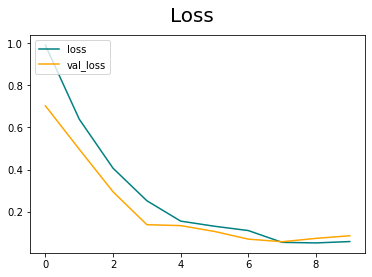

In [95]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [96]:
print(hist.history.keys())

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


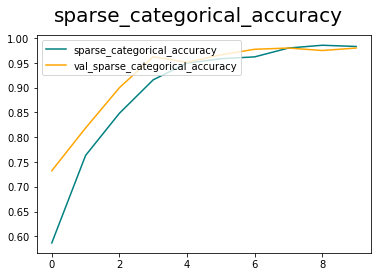

In [97]:
fig = plt.figure()
plt.plot(hist.history['sparse_categorical_accuracy'], color='teal', label='sparse_categorical_accuracy')
plt.plot(hist.history['val_sparse_categorical_accuracy'], color='orange', label='val_sparse_categorical_accuracy')
fig.suptitle('sparse_categorical_accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [98]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [99]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [100]:
len(test)

1

In [101]:
for element in test_data.as_numpy_iterator(): 
    X, y = element
    yhat = model.predict(X)
    pred = (np.argmax(yhat, axis=-1))
    # pre.update_state(y, yhat)
    # re.update_state(y, yhat)
    # acc.update_state(y, yhat)
    unique2, counts2 = np.unique(y, return_counts=True)
    dict(zip(unique2, counts2))
    # print (yhat)
    # print (y)

print (pred)

unique2, counts2 = np.unique(pred, return_counts=True)
dict(zip(unique2, counts2))

noInBatch= (len(pred))


[3 3 1 3 1 3 1 0 3 2 1 1 2 3 1 3 3 2 1 1 3 3 2 3 2 2 1 0 3 2 3 2 1 3 2 3 0
 2 1 1 0 3 1 1 3 2 0 0 0 3 3 0 1 2 0 1 2 2 2 2 2 1 1 3 0 3 2 2 0 1 0 3 3 1
 2 2 3 2 3 3 3 2 0 3 3 3 2 0 3 1 2 3 3 0 3 2 1 3 0 2 2 2 3 3 3 0 3 0 2 1 0
 2 2 2 3 3 1 3 0 0]


In [102]:
stats = dict(zip(unique2, counts2))
print (stats)

nbrBlotch = stats[0]
nbrNormal = stats[1]
nbrRot = stats[2]
nbrScab = stats[3]
nbrRej = int(nbrBlotch)+int(nbrRot)+int(nbrScab)

percBlotch = int(nbrBlotch)/int(noInBatch)*100
percNormal = int(nbrNormal)/int(noInBatch)*100
percRot = int(nbrRot)/int(noInBatch)*100
percScab = int(nbrScab)/int(noInBatch)*100
percRej = int(nbrRej)/int(noInBatch)*100

if noInBatch != 120:
    
    print ("Please offer a batch of 80 apples for a correct quality control")

else:
    if nbrNormal >= 119: #79:                                          
        batchStatus = (f'The batch has been qualified as: Class 1\n , this is suitable for supermarkets and greengrocers.')
    elif nbrNormal >= 112: #75:
        batchStatus = (f'The batch has been qualified as: Class 2\n , this is suitable to be used in apple sauce.')
    elif nbrNormal >= 109: #73:
         (f'The batch has been qualified as: Class 3\n, this is suitable to be used in apple syrup.')
    else:
        batchStatus = (f'The batch has been rejected\n, this is too bad for you.')
    
print (batchStatus)

print (noInBatch)
print (percRej)

{0: 21, 1: 24, 2: 33, 3: 42}
The batch has been rejected
, this is too bad for you.
120
80.0


voorbeeld om in andere files dingen te gaan ophalen.
 math.ceil(0.9)
in file 1 heb je de functie voor stats

in file 2: import 422

dan lager in 2

in file 2: 422.functie voor stats()

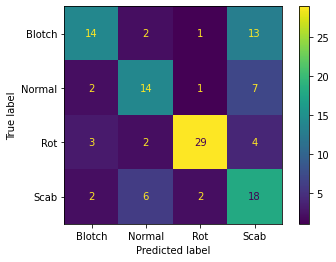

In [103]:

# plt.plot(history.history['accuracy'], label='Train accuracy')
# plt.plot(history_test.history['accuracy'], label = 'Test accuracy')

actual = y
predicted = pred

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Blotch', 'Normal', 'Rot', 'Scab'])

cm_display.plot()
plt.show()

In [104]:
testscore = model.evaluate(test_data)

1/1 [==============================] - 0s 311ms/step - loss: 2.1869 - sparse_categorical_accuracy: 0.6250


In [105]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


# 10. Test

In [106]:
import cv2

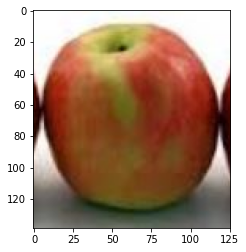

In [107]:
img = cv2.imread('data/Test/Normal_Apple/Normal_Apple12.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

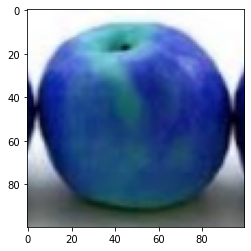

In [108]:
resize = tf.image.resize(img, (100,100))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [109]:
yhat = model.predict(np.expand_dims(resize/255, 0))
pred = np.argmax(yhat, axis=-1)

In [110]:
if pred == [3]: print ('the model predicts an apple with scab')
elif pred == [2]: print ('the model predicts an apple with rot')
elif pred == [1]: print ('the model predicts this is a normal healthy apple')
elif pred == [0]: print ('the model predicts this is a blotched apple')
else: print ('the model also has no idea what you put in')

the model predicts an apple with scab


if num > 0:
    print("Positive number")
elif num == 0:
    print("Zero")
else:
    print("Negative number")

# 11. Save the Model and test loading the Model

In [111]:
from tensorflow.keras.models import load_model

In [112]:
model.save(os.path.join('models','appleclassifier422Dropout03augmented.h5'))

In [113]:
new_model = load_model('models/appleclassifier422Dropout03augmented.h5')

In [114]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 10, 10, 32)      

In [115]:
yhat_new = new_model.predict(np.expand_dims(resize/255, 0))

In [116]:
pred_new = np.argmax(yhat_new, axis=-1)

In [117]:
if pred_new == [3]: print ('the model predicts an apple with scab')
elif pred_new == [2]: print ('the model predicts an apple with rot')
elif pred_new == [1]: print ('the model predicts this is a normal healthy apple')
elif pred_new == [0]: print ('the model predicts this is a blotched apple')
else: print ('the model also has no idea what you put in')

the model predicts an apple with scab


De vragen die ik bij 2_1 nog had zijn beantwoord door uitwerking 

Nieuwe vraag:

voor het aanmaken van de data moet ik soms onderstaand commando runnen bij foutmelding:

find . -name "*.DS_Store" -type f -delete

wat is dit?


Van to do 1_2 zijn confusion matrix en plots afgehandeld

new to do - 
To do - image rescalen naar 100x100
expirimenteren met model / dataset en augmentation
transfer learning